### Analyzing the evolution of poverty and income distribution in the United States.

### Data source: 

https://www.census.gov/did/www/saipe/data/statecounty/data/index.html

Use the given code snippet to access the data files

The data fields are described here:https://www.census.gov/did/www/saipe/data/statecounty/data/2000.html 
Extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
### Pandas Data-Frames

1)
    - create a data frame with just the country-wide data
    - create a data frame with just the data of the states
    - create a data frame with just the data of the counties

    
2) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

3) Plot the total poverty in each state across the years and compare it with the country-wide poverty

4) Plot county-wide poverty stats

- Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2000, 'Poverty Percent All Ages' in every county in 2013 and the change ratio between 2000 and 2013. (change ratio = poverty % in 2013 / poverty % in 2000. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty is higher compared to the nation-wide poverty and a value < 1 indicates that poverty is lower compared to the nationwide poverty.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.


- Plot the 'Poverty Percent All Ages' for each county on the map for the years 2000 and 2013.
- Plot the normalized change ratio on the map.
- Find the counties which witnessed the most positive and most negative change in poverty,

For this visualization, we will use a library called Vincent, which lets you plot data for places using their FIPS code instead of using latitude/longitude. 

To install vincent do
`pip install vincent` or `conda install vincent`


To use it in the notebook and display the maps inside the notebook do

`import vincent`

`vincent.core.initialize_notebook()`

You can find further details about how to use it here - http://wrobstory.github.io/2013/10/mapping-data-python.html and https://github.com/wrobstory/vincent

Before closing your notebook, please clear the output of the vincent maps as it becomes difficult of reload the notebook later. For plotting the counties on the map, you will need to use the file us_counties.topo.json present in the exam folder.

Tips: -  
    Check the type of datafields before operating on them. It will also help you debug for errors.
    Clean the data before using it. Drop those rows before using them.

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [177]:
import urllib2

dflist = ['State FIPS', 'County FIPS','FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal','Year']
urls = ['https://www.census.gov/did/www/saipe/downloads/estmod93/est93ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod95/est95ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod97/est97ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod98/est98ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod99/est99ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod01/est01ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod02/est02ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod03/est03ALL.dat',
        'https://www.census.gov/did/www/saipe/downloads/estmod04/est04ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod05/est05ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod06/est06ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod07/est07ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod08/est08ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod09/est09ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod10/est10ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod11/est11all.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod12/est12ALL.txt',
        'https://www.census.gov/did/www/saipe/downloads/estmod13/est13ALL.txt']

def getUrl(urls):
    dfdic = {'State FIPS':[], 'County FIPS':[],'FIPS':[],'Poverty Estimate All Ages':[], 'Poverty Percent All Ages':[], 
                 'Poverty Estimate Under Age 18':[], 'Poverty Percent Under Age 18':[], 'Poverty Estimate Ages 5-17':[], 
                 'Poverty Percent Ages 5-17':[], 'Median Household Income':[],'Name':[],'Postal':[],'Year':[]}
    for url in urls:
        yr = url[-9:-7]
        if int(yr) < 20: 
            yr = str('20') + str(yr)
        else: yr = str('19') + str(yr)
        
        
        
        response = urllib2.urlopen(url)
        lines = response.read().split('\n')
        del lines[-1]
        for i in lines:
            dfdic['State FIPS'].append(i[0:2])
            dfdic['County FIPS'].append("%03d" % int(i[3:6])) #############
            ##########
            ########## CONVERT THE COUNTY FIPS NUMBER TO 3 DIGITS
            ########## ADD THE FIPS COLUMN
            dfdic['FIPS'].append(str(i[0:2]) + str("%03d" % int(i[3:6])))
            dfdic['Poverty Estimate All Ages'].append(i[7:15])
            dfdic['Poverty Percent All Ages'].append(i[34:38])
            dfdic['Poverty Estimate Under Age 18'].append(i[49:57])
            dfdic['Poverty Percent Under Age 18'].append(i[76:80])
            dfdic['Poverty Estimate Ages 5-17'].append(i[91:99])
            dfdic['Poverty Percent Ages 5-17'].append(i[118:122])
            dfdic['Median Household Income'].append(i[133:139])
            dfdic['Name'].append(i[193:238])
            dfdic['Postal'].append(i[239:241])
            dfdic['Year'].append(yr)
        
    df = pd.DataFrame(dfdic)
    df = df[dflist]    
    df.ix[:,3:10] = df.ix[:,3:10].apply(lambda x :pd.to_numeric(x,errors = 'coerce'))        
    return df
        #TODO -code to use the text data

        
        
#print(urls[0])        
data1 = getUrl(urls)
data1

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
0             00         000  00000               3.92648e+07   
1             01         000  01000                    790351   
2             01         001  01001                      5862   
3             01         003  01003                     15778   
4             01         005  01005                      6373   
5             01         007  01007                      3527   
6             01         009  01009                      6276   
7             01         011  01011                      3428   
8             01         013  01013                      5937   
9             01         015  01015                     20320   
10            01         017  01017                      6966   
11            01         019  01019                      3179   
12            01         021  01021                      6405   
13            01         023  01023                      4043   
14            01         025  01025                      6854   
15            01         027  01027                      2178   
16            01         029  01029                      2083   
17            01         031  01031                      6277   
18            01         033  01033                      8087   
19            01         035  01035                      3905   
20            01         037  01037                      1983   
21            01         039  01039                      8029   
22            01         041  01041                      3081   
23            01         043  01043                     11005   
24            01         045  01045                      8513   
25            01         047  01047                     16283   
26            01         049  01049                      9997   
27            01         051  01051                      8268   
28            01         053  01053                      8568   
29            01         055  01055                     18337   
...          ...         ...    ...                       ...   
60650         55         131  55131                      9209   
60651         55         133  55133                     22437   
60652         55         135  55135                      6242   
60653         55         137  55137                      3020   
60654         55         139  55139                     20328   
60655         55         141  55141                      8585   
60656         56         000  56000                     62118   
60657         56         001  56001                      7110   
60658         56         003  56003                      1323   
60659         56         005  56005                      3554   
60660         56         007  56007                      2118   
60661         56         009  56009                      1336   
60662         56         011  56011                       557   
60663         56         013  56013                      6120   
60664         56         015  56015                      2022   
60665         56         017  56017                       596   
60666         56         019  56019                       745   
60667         56         021  56021                      9627   
60668         56         023  56023                      1623   
60669         56         025  56025                      8003   
60670         56         027  56027                       346   
60671         56         029  56029                      2849   
60672         56         031  56031                       942   
60673         56         033  56033                      2944   
60674         56         035  56035                       626   
60675         56         037  56037                      3850   
60676         56         039  56039                      1700   
60677         56         041  56041                      2515   
60678         56         043  56043                       941   
60679         56         045  56045      

In [178]:
# dfdic = {'State FIPS':[], 'County FIPS':[],'Poverty Estimate All Ages':[], 'Poverty Percent All Ages':[], 
#                  'Poverty Estimate Under Age 18':[], 'Poverty Percent Under Age 18':[], 'Poverty Estimate Ages 5-17':[], 
#                  'Poverty Percent Ages 5-17':[], 'Median Household Income':[],'Name':[],'Postal':[],'Year':[]}
# dflist = ['State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal','Year']
# lines = urllib2.urlopen('https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat').read().split('\n')
# url = ('https://www.census.gov/did/www/saipe/downloads/estmod00/est00ALL.dat')
# yr = url[-9:-7]
# if int(yr) < 20: 
#     yr = str('20') + str(yr)
# else: yr = str('19') + str(yr)
# print(yr)
# for i in lines:
#     dfdic['State FIPS'].append(i[0:2])
#     dfdic['County FIPS'].append(i[4:6])
#     dfdic['Poverty Estimate All Ages'].append(i[7:15])
#     dfdic['Poverty Percent All Ages'].append(i[34:38])
#     dfdic['Poverty Estimate Under Age 18'].append(i[49:57])
#     dfdic['Poverty Percent Under Age 18'].append(i[76:80])
#     dfdic['Poverty Estimate Ages 5-17'].append(i[91:99])
#     dfdic['Poverty Percent Ages 5-17'].append(i[118:122])
#     dfdic['Median Household Income'].append(i[133:139])
#     dfdic['Name'].append(i[193:238])
#     dfdic['Postal'].append(i[239:241])
#     dfdic['Year'].append(yr)
    
    

# df = pd.DataFrame(dfdic)
# df = df[dflist]
# df

In [179]:
data1.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
0         00         000  00000               3.92648e+07   
1         01         000  01000                    790351   
2         01         001  01001                      5862   
3         01         003  01003                     15778   
4         01         005  01005                      6373   

  Poverty Percent All Ages Poverty Estimate Under Age 18  \
0                     15.1                   1.57275e+07   
1                     18.8                        288512   
2                     15.2                          2340   
3                     13.6                          5970   
4                       25                          2411   

  Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
0                         22.7                9.81413e+06   
1                         26.2                     187081   
2                         20.9                       1507   
3                         19.9                       3820   
4                         32.9                       1601   

  Poverty Percent Ages 5-17 Median Household Income  \
0                      20.4                   31241   
1                      24.2                   25907   
2                        19                   30906   
3                        18                   29040   
4                      30.7                   22446   

                                            Name Postal  Year  
0  United States                                     US  1993  
1  Alabama                                           AL  1993  
2  Autauga County                                    AL  1993  
3  Baldwin County                                    AL  1993  
4  Barbour County                                    AL  1993

### Q1: Create the dataframes

Download and parse the data files and create the following three pandas dataframes: (your dataframes should have data in the format shown below)

 * US_stat: statistics for the whole United States.
 * states_stat: Statistics for each state.
 * county_stat: Statistics for each county.

In [180]:
US_stat = data1.set_index('Year')
US_stat = US_stat.loc[US_stat['State FIPS'] == '00']
#US_stat


In [181]:
US_stat.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
Year                                                           
1993         00         000  00000               3.92648e+07   
1995         00         000  00000               3.64246e+07   
1997         00         000  00000               3.55739e+07   
1998         00         000  00000               3.44758e+07   
1999         00         000  00000               3.27913e+07   

     Poverty Percent All Ages Poverty Estimate Under Age 18  \
Year                                                          
1993                     15.1                   1.57275e+07   
1995                     13.8                    1.4665e+07   
1997                     13.3                   1.41131e+07   
1998                     12.7                   1.34665e+07   
1999                     11.9                   1.22803e+07   

     Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Year                                                           
1993                         22.7                9.81413e+06   
1995                         20.8                9.30602e+06   
1997                         19.9                9.30670e+06   
1998                         18.9                8.92294e+06   
1999                         17.1                8.18807e+06   

     Poverty Percent Ages 5-17 Median Household Income  \
Year                                                     
1993                      20.4                   31241   
1995                      18.7                   34076   
1997                      18.4                   37005   
1998                      17.5                   38885   
1999                      15.9                   40696   

                                               Name Postal  
Year                                                        
1993  United States                                     US  
1995  United States                                     US  
1997  United States                                     US  
1998  United States                                     US  
1999  United States                                     US

In [182]:
states_stat = data1.set_index(['Postal','Year'])
# states_stat = states_stat.set_index('Postal')
states_stat = states_stat.loc[states_stat['State FIPS'] != '00']
states_stat = states_stat.loc[states_stat['County FIPS'] == '000']
states_stat = states_stat.sort_index(axis = 0,ascending = True)
states_stat.head()

State FIPS County FIPS   FIPS Poverty Estimate All Ages  \
Postal Year                                                           
AK     1993         02         000  02000                     67099   
       1995         02         000  02000                     60735   
       1997         02         000  02000                     68409   
       1998         02         000  02000                     65970   
       1999         02         000  02000                     53963   

            Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal Year                                                          
AK     1993                     11.2                         30628   
       1995                     10.1                         25270   
       1997                     11.2                         31968   
       1998                     10.8                         28014   
       1999                      8.8                         21176   

            Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal Year                                                           
AK     1993                         15.9                      17496   
       1995                         13.2                      15234   
       1997                         16.2                      21786   
       1998                         14.6                      19387   
       1999                         11.2                      14137   

            Poverty Percent Ages 5-17 Median Household Income  \
Postal Year                                                     
AK     1993                      13.3                   39431   
       1995                      11.2                   42255   
       1997                      15.1                   43657   
       1998                      13.6                   47177   
       1999                      10.1                   49133   

                                                      Name  
Postal Year                                                 
AK     1993  Alaska                                         
       1995  Alaska                                         
       1997  Alaska                                         
       1998  Alaska                                         
       1999  Alaska

In [183]:
county_stat = data1.set_index(['Postal','FIPS','Year'])
county_stat = county_stat.loc[county_stat['State FIPS'] != '00']
county_stat = county_stat.loc[county_stat['County FIPS'] != '000']
# county_stat = county_stat.sort_index(axis = 1,ascending = True)
county_stat = county_stat.sort_index(axis = 0,ascending = True)
county_stat.head()

State FIPS County FIPS Poverty Estimate All Ages  \
Postal FIPS  Year                                                    
AK     02013 1993         02         013                       224   
             1995         02         013                       242   
             1997         02         013                       322   
             1998         02         013                       265   
             1999         02         013                       240   

                  Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal FIPS  Year                                                          
AK     02013 1993                      9.7                            64   
             1995                     10.3                            72   
             1997                     14.2                           125   
             1998                     12.1                            85   
             1999                      8.9                            46   

                  Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal FIPS  Year                                                           
AK     02013 1993                           11                         36   
             1995                         11.3                         44   
             1997                         20.8                         89   
             1998                         15.1                         72   
             1999                           10                         27   

                  Poverty Percent Ages 5-17 Median Household Income  \
Postal FIPS  Year                                                     
AK     02013 1993                       9.1                   46829   
             1995                        10                   46173   
             1997                      20.4                   42714   
             1998                      17.3                   40350   
             1999                         8                   39386   

                                                            Name  
Postal FIPS  Year                                                 
AK     02013 1993  Aleutians East Borough                         
             1995  Aleutians East Borough                         
             1997  Aleutians East Borough                         
             1998  Aleutians East Borough                         
             1999  Aleutians East Borough

In [184]:
# df.iloc[df.index.get_level_values('A') == 1]
county_stat.loc[county_stat.index.get_level_values('Year') == '2000']

State FIPS County FIPS Poverty Estimate All Ages  \
Postal FIPS  Year                                                    
AK     02013 2000         02         013                       314   
       02016 2000         02         016                       347   
       02020 2000         02         020                     17188   
       02050 2000         02         050                      3554   
       02060 2000         02         060                        70   
       02068 2000         02         068                        85   
       02070 2000         02         070                       867   
       02090 2000         02         090                      5654   
       02100 2000         02         100                       237   
       02110 2000         02         110                      1746   
       02122 2000         02         122                      4337   
       02130 2000         02         130                       974   
       02150 2000         02         150                       982   
       02164 2000         02         164                       290   
       02170 2000         02         170                      5367   
       02180 2000         02         180                      1553   
       02185 2000         02         185                       565   
       02188 2000         02         188                      1119   
       02201 2000         02         201                       850   
       02220 2000         02         220                       568   
       02232 2000         02         232                       261   
       02240 2000         02         240                       962   
       02261 2000         02         261                       776   
       02270 2000         02         270                      2028   
       02280 2000         02         280                       539   
       02282 2000         02         282                        65   
       02290 2000         02         290                      1142   
AL     01001 2000         01         001                      4681   
       01003 2000         01         003                     13855   
       01005 2000         01         005                      5847   
...                      ...         ...                       ...   
WV     54097 2000         54         097                      4169   
       54099 2000         54         099                      7201   
       54101 2000         54         101                      2575   
       54103 2000         54         103                      2751   
       54105 2000         54         105                      1044   
       54107 2000         54         107                     11424   
       54109 2000         54         109                      5598   
WY     56001 2000         56         001                      3904   
       56003 2000         56         003                      1564   
       56005 2000         56         005                      2239   
       56007 2000         56         007                      1682   
       56009 2000         56         009                      1235   
       56011 2000         56         011                       492   
       56013 2000         56         013                      5552   
       56015 2000         56         015                      1792   
       56017 2000         56         017                       564   
       56019 2000         56         019                       750   
       56021 2000         56         021                      7423   
       56023 2000         56         023                      1317   
       56025 2000         56         025                      7276   
       56027 2000         56         027                       333   
       56029 2000         56         029                      2785   
       56031 2000         56         031                      1071   
       56033 2000         56         033                      2788   
       56035 2000         56

In [185]:
import matplotlib.pyplot as plt

### Q2. Plot the US-wide statistics on poverty.

Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 

Compute the percentage of increase in poverty in the US between 2000 and 2013. - [poverty % in 2013] / [poverty % in 2000]

In [186]:
# fig = plt.figure()
# for i in range(1, 7):
#     ax = fig.add_subplot(2, 3, i)
#     ax.text(0.45, 0.45, str(i), fontsize=24)

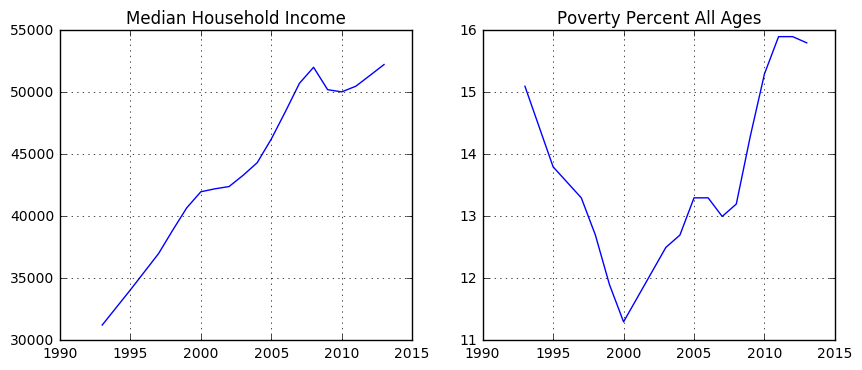

In [187]:
plt.figure(1,figsize = (10,4))

plt.subplot(1,2,1)
plt.plot(US_stat['Median Household Income'])
plt.title("Median Household Income")
plt.grid()

plt.subplot(1,2,2)
plt.plot(US_stat['Poverty Percent All Ages'])
plt.title("Poverty Percent All Ages")
plt.grid()

plt.show()

In [188]:
## COMPUTE the percentage increase in poverty between 1993 and 2013
print("This script computes the percentage increase in poverty in the United states between two years chronologically")
yrs = raw_input("Please input the years you would like to calculate (split by a comma)").split(',')
yrs.sort()
try:
    povdif = float(US_stat['Poverty Percent All Ages'][yrs[1]]) / float(US_stat['Poverty Percent All Ages'][yrs[0]])
    print("poverty percent change ratio from %s to %s is " + str(povdif))%(yrs[0],yrs[1])
except KeyError:
    print('ERROR')
    print("This year is not in the dataframe")
    


This script computes the percentage increase in poverty in the United states between two years chronologically
Please input the years you would like to calculate (split by a comma)2000,2013
poverty percent change ratio from 2000 to 2013 is 1.3982300885


### 2000 was a good year

We see from these graphs that even though the median household in the US keeps increasing at a more or less constant rate, the pocerty levels reached a minimum at 2000 and have increased dramatically , by 40% since then.

We will now attempt to identify the geographic distribution of the rise in poverty since 2000.

We start by plotting the time evolution of poverty for each of the states.

### Q3: Plot the change in poverty percentages by state.

For each state, plot the poverty levels across time and compare it with the nation-wide poverty level. Produce a graph similar to the ones below.

In [189]:
# from pandas.tools.plotting import scatter_matrix
# df = Djoined.ix[:,['latitude','elevation','Mean','Std','V0','V1','V2','V3','V4','V5']]
# scatter_matrix(df, alpha=0.03, figsize=(20, 20), diagonal='kde'); ##creates matrix of scatter plots to see them all 
# ## simultaneously
# print(states_stat.index)
# testdf = states_stat.loc[['AK']] ##index multilevel df
# testdf.reset_index('Postal')
# states_stat.index.get_level_values('Postal').unique()## gets unique values in one multilevel index
# range(len(states_stat.index.get_level_values('Postal').unique()))

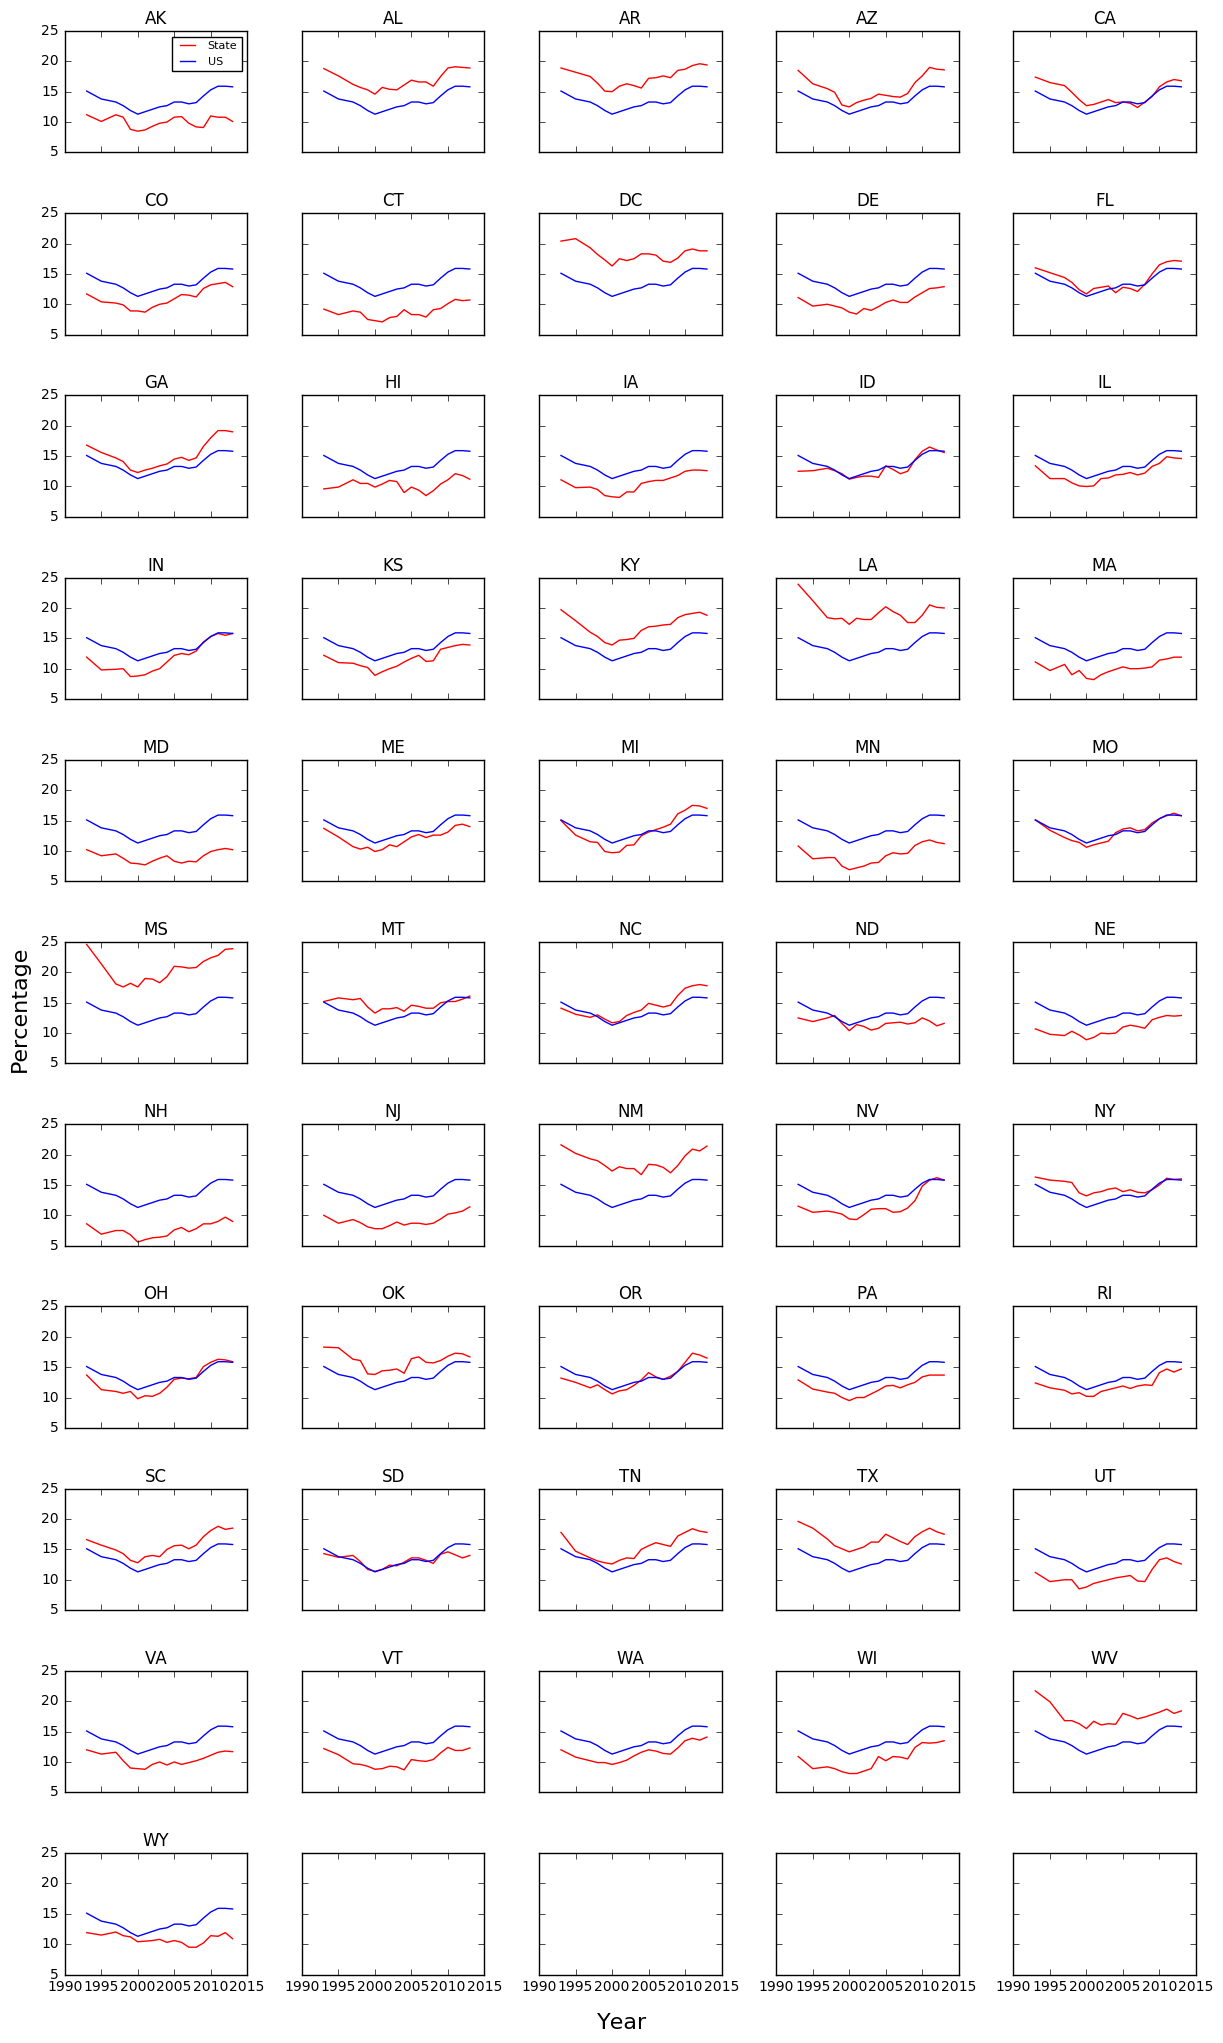

In [336]:
fig, axs = plt.subplots(nrows=11, ncols=5, sharex=True, sharey=True, figsize=(12,20))
fig.tight_layout()
fig.subplots_adjust(hspace=.5, wspace=.3)
fig.text(0.5, -0.01, 'Year', ha='center', fontsize=16)
fig.text(-0.01, 0.5, 'Percentage', va='center', rotation='vertical', fontsize=16)


axs = axs.ravel() #unravel axis list
states = states_stat.index.get_level_values('Postal').unique().tolist()

i=0
for state in states:
    axs[i].plot(states_stat.loc[state]['Poverty Percent All Ages'],c='red')
    axs[i].plot(US_stat['Poverty Percent All Ages'],c='blue')
    axs[i].set_title(state)
    axs[0].legend(['State', 'US'], fontsize=8) #add legend to first graph
    i+=1

### Q4: plot poverty statistics by county

Using the vincent library and the dataframe `county_stat`, generate the following three maps.

1. Overall percentage of poverty for each county in 2000.

1. Overall percentage of poverty for each county in 2013.

1. Ratio between percentage of change in poverty from 2000 to 2013 for each county. Divided by the nation-wide change in poverty (1.39).


In [265]:
povdata = county_stat.loc[(county_stat.index.get_level_values('Year') == '2000') |
                         (county_stat.index.get_level_values('Year') == '2013')]
povdata.drop(['State FIPS','County FIPS','Poverty Estimate All Ages',
             'Poverty Estimate Under Age 18','Poverty Percent Under Age 18',
              'Poverty Estimate Ages 5-17','Poverty Percent Ages 5-17','Median Household Income',
             'Name'],inplace = True,axis=1)
# povdata = povdata.reset_index('FIPS')
# povdata.set_index(['FIPS','Postal','Year'],inplace = True)
povdata= povdata.unstack(level=2)
povdata = povdata.xs('Poverty Percent All Ages',axis=1,drop_level=True)
povdata = povdata.reset_index(level=[0,1],drop=False)
povdata.columns.names= ['']

# pov2000 = povdata['2000'].tolist()
# pov2013 = povdata['2000'].tolist()
# test = [int(b) / int(m) for b,m in zip(pov2000,pov2013)]
# print(test)    
povdata['2000']

povdata['Change_in_percent'] = povdata['2013']/povdata['2000']
povdata['Normalized_Change'] = povdata['Change_in_percent'] / 1.398
povdata.head()

/Users/Garrett/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Postal   FIPS  2000  2013 Change_in_percent Normalized_Change
0     AK  02013  12.6  15.2           1.20635          0.862911
1     AK  02016   6.1   8.1           1.32787          0.949835
2     AK  02020   6.7   7.7           1.14925           0.82207
3     AK  02050  22.2  25.1           1.13063          0.808749
4     AK  02060   5.9   9.5           1.61017           1.15177

In [267]:
import json
import pandas as pd
#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code type casting to ensure keys match
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)
county_df.tail()

# #Read county unemployment data into Dataframe, cast to int for consistency
# df = povdata.reset_index('FIPS')
povdata['FIPS'] = povdata['FIPS'].astype(int)

# #Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(povdata, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')
merged.head()

Postal  FIPS  2000  2013  Change_in_percent  Normalized_Change
0     AK  2013  12.6  15.2           1.206349           0.862911
1     AK  2016   6.1   8.1           1.327869           0.949835
2     AK  2020   6.7   7.7           1.149254           0.822070
3     AK  2050  22.2  25.1           1.130631           0.808749
4     AK  2060   5.9   9.5           1.610169           1.151766

In [268]:
# merged['Change_in_percent'] = merged['Change_in_percent'].apply(lambda x: round(x,3))
# merged['Normalized_Change'] = merged['Normalized_Change'].apply(lambda x: round(x,3))
merged.head()


Postal  FIPS  2000  2013  Change_in_percent  Normalized_Change
0     AK  2013  12.6  15.2           1.206349           0.862911
1     AK  2016   6.1   8.1           1.327869           0.949835
2     AK  2020   6.7   7.7           1.149254           0.822070
3     AK  2050  22.2  25.1           1.130631           0.808749
4     AK  2060   5.9   9.5           1.610169           1.151766

In [196]:
import vincent
vincent.core.initialize_notebook()

In [269]:
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind='2000',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'},
                 brew = 'YlGnBu')
# vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0,4,6,8,10,12,20,30]
vis.to_json('vega.json')

vis.legend(title='Poverty 2000 (%)')
vis.display()


In [270]:
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind='2013',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'},
                 brew = 'YlGnBu')
# vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0,4,6,8,10,12,20,30]
vis.to_json('vega.json')

vis.legend(title='Poverty 2013 (%)')
vis.display()


In [271]:
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=merged, geo_data=geo_data, scale=1100,
                  projection='albersUsa', data_bind='Normalized_Change',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'},
                 brew = 'YlGnBu')
# vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
#Change our domain for an even inteager
vis.scales['color'].type = 'threshold'
vis.scales['color'].domain = [0,0.8,0.9,1.0,1.1,1.2,1.3]
vis.to_json('vega.json')

vis.legend(title='Change in Poverty (%)')
vis.display()


### Q5: Identify the extremes.
Find out which are the counties in which the poverty percentage increased or decreased the most during the period 2000 - 2013.

In [328]:
minmaxdata = merged.sort_values(by='Normalized_Change',ascending=True)
minmaxdata.tail()

Postal   FIPS  2000  2013  Change_in_percent  Normalized_Change
1449     MI  26139   4.8  11.3           2.354167           1.683953
1426     MI  26099   5.6  13.4           2.392857           1.711629
1485     MN  27037   3.5   8.4           2.400000           1.716738
554      GA  13135   5.6  13.7           2.446429           1.749949
741      IA  19169   8.2  21.1           2.573171           1.840609

In [337]:
county_stat.head()

State FIPS County FIPS Poverty Estimate All Ages  \
Postal FIPS  Year                                                    
AK     02013 1993         02         013                       224   
             1995         02         013                       242   
             1997         02         013                       322   
             1998         02         013                       265   
             1999         02         013                       240   

                  Poverty Percent All Ages Poverty Estimate Under Age 18  \
Postal FIPS  Year                                                          
AK     02013 1993                      9.7                            64   
             1995                     10.3                            72   
             1997                     14.2                           125   
             1998                     12.1                            85   
             1999                      8.9                            46   

                  Poverty Percent Under Age 18 Poverty Estimate Ages 5-17  \
Postal FIPS  Year                                                           
AK     02013 1993                           11                         36   
             1995                         11.3                         44   
             1997                         20.8                         89   
             1998                         15.1                         72   
             1999                           10                         27   

                  Poverty Percent Ages 5-17 Median Household Income  \
Postal FIPS  Year                                                     
AK     02013 1993                       9.1                   46829   
             1995                        10                   46173   
             1997                      20.4                   42714   
             1998                      17.3                   40350   
             1999                         8                   39386   

                                                            Name  
Postal FIPS  Year                                                 
AK     02013 1993  Aleutians East Borough                         
             1995  Aleutians East Borough                         
             1997  Aleutians East Borough                         
             1998  Aleutians East Borough                         
             1999  Aleutians East Borough

In [329]:
maxdecrease = minmaxdata.iloc[0]

maxincrease = minmaxdata.iloc[-1]

##  within the indices of county_stat, look up maxincrease[1] the second index (in this case FIPS), 
## then in the first row of the resulting dataframe, grab the value in the first row of the "name" column 
maxcounty = county_stat.loc(axis=0)[:,str(maxincrease[1]),:].iloc[0].loc['Name']
mincounty = county_stat.loc(axis=0)[:,str(maxdecrease[1]),:].iloc[0].loc['Name']
maxstate = maxincrease[0]
minstate = maxdecrease[0]
maxchange = maxincrease[5]
minchange = maxdecrease[5]


print("County with max increase in poverty -- {} in state {} \nchange = {}".format(maxcounty.rstrip(),maxstate,maxchange))
print("County with max decrease in poverty -- {} in state {} \nchange = {}".format(mincounty.rstrip(),minstate,minchange))

County with max increase in poverty -- Story County in state IA 
change = 1.84060853484
County with max decrease in poverty -- Billings County in state ND 
change = 0.425037838734
